# Associative Analysis

## Probelm statement:
To find association between items sold in a supermarket from a list of transacations.
## Metric of sucess:
To successful identify itemsets that have a close association using certain Association rules.
## Data relevance:
* The relevance of the data will depend on sufficiency of data to estabilish association among groups of items sold in a supermarket.

## Data souce:
our data set is stored in a csv file that contains list of items in a transcation.
## Experimental design
* load and preview the dataset
* obtain summary of the dataset
* Explore frequent items.
* Establish Association rules and apply on the dataset.
* Inspect and interpret the rules and the outcomes



In [3]:
#Loading arules libray
library(arules)

Warning message:
"package 'arules' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"
Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



In [4]:
transactions<- read.transactions('Supermarket_Sales_Dataset II.csv', sep =',', header = 0)
head(transactions)

Warning message in asMethod(object):
"removing duplicated items in transactions"

transactions in sparse format with
 6 transactions (rows) and
 119 items (columns)

In [5]:
class(transactions)

[1] "transactions"
attr(,"package")
[1] "arules"

In [6]:
dim(transactions)

[1] 7501  119

In [7]:
#generating summary of the dataset
summary(transactions)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

In [8]:
#Exploring of the frequency of some articles
itemFrequency(transactions[, 1:6],type = "absolute")
#Frequency in terms of frequency.
round(itemFrequency(transactions[, 1:6],type = "relative")*100,2)

almonds antioxydant juice         asparagus           avocado 
              153                67                36               250 
      babies food             bacon 
               34                65

almonds antioxydant juice         asparagus           avocado 
             2.04              0.89              0.48              3.33 
      babies food             bacon 
             0.45              0.87

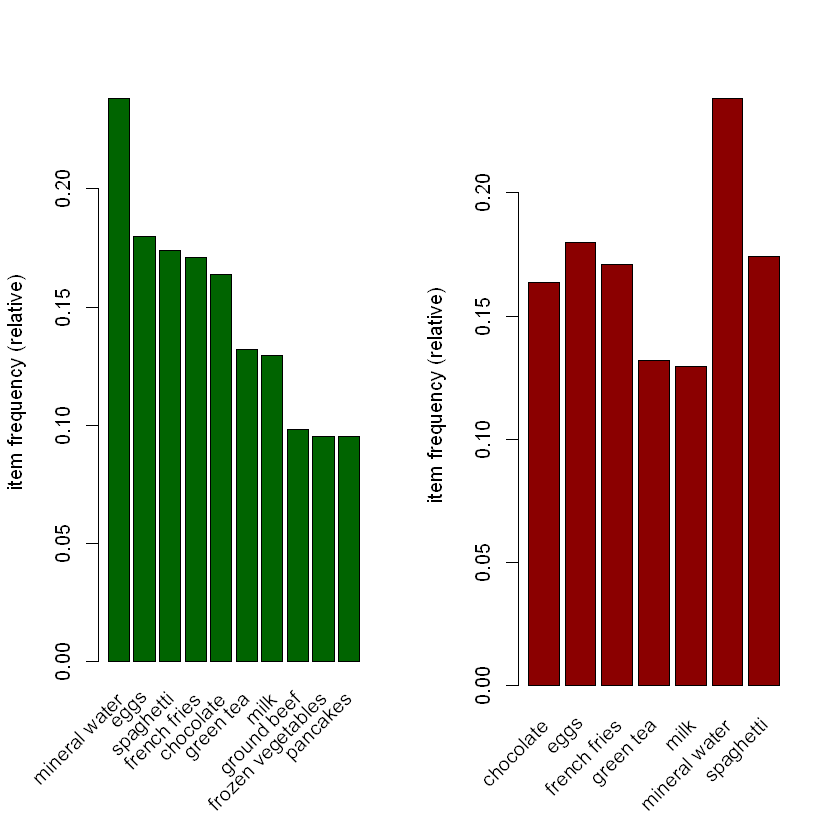

In [9]:
# Displaying top 10 most common items in the transactions dataset 
# and the items whose relative importance is at least 10%
# 
par(mfrow = c(1, 2))

# plot the frequency of items
itemFrequencyPlot(transactions, topN = 10,col="darkgreen")
itemFrequencyPlot(transactions, support = 0.1,col="darkred")

In [10]:
#Building a model based on the association rules.
#Then apply Apriori fuction setting support as 0.001 and confidence at 0.8
rules <- apriori (transactions, parameter = list(supp = 0.0009, conf = 0.75))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.75    0.1    1 none FALSE            TRUE       5   9e-04      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 6 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [117 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [226 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 226 rules 

In [11]:
summary(rules)

set of 226 rules

rule length distribution (lhs + rhs):sizes
  3   4   5   6 
 34 130  61   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.128   5.000   6.000 

summary of quality measures:
    support            confidence          lift            count      
 Min.   :0.0009332   Min.   :0.7500   Min.   : 3.146   Min.   : 7.00  
 1st Qu.:0.0009332   1st Qu.:0.7778   1st Qu.: 3.356   1st Qu.: 7.00  
 Median :0.0009332   Median :0.8000   Median : 4.308   Median : 7.00  
 Mean   :0.0011279   Mean   :0.8241   Mean   : 4.580   Mean   : 8.46  
 3rd Qu.:0.0011998   3rd Qu.:0.8750   3rd Qu.: 4.854   3rd Qu.: 9.00  
 Max.   :0.0030663   Max.   :1.0000   Max.   :12.722   Max.   :23.00  

mining info:
         data ntransactions support confidence
 transactions          7501   9e-04       0.75

In [12]:
inspect(rules[1:8])

    lhs                                 rhs             support      confidence
[1] {mayonnaise,pancakes}            => {mineral water} 0.0009332089 0.7777778 
[2] {eggs,mayonnaise}                => {mineral water} 0.0009332089 0.7777778 
[3] {frozen smoothie,spinach}        => {mineral water} 0.0010665245 0.8888889 
[4] {shrimp,strong cheese}           => {mineral water} 0.0009332089 0.8750000 
[5] {blueberries,chicken}            => {mineral water} 0.0009332089 0.7777778 
[6] {blueberries,eggs}               => {mineral water} 0.0015997867 0.7500000 
[7] {herb & pepper,whole weat flour} => {milk}          0.0009332089 0.7777778 
[8] {herb & pepper,whole weat flour} => {mineral water} 0.0009332089 0.7777778 
    lift     count
[1] 3.262926  7   
[2] 3.262926  7   
[3] 3.729058  8   
[4] 3.670791  7   
[5] 3.262926  7   
[6] 3.146393 12   
[7] 6.002172  7   
[8] 3.262926  7   


**Interpretation:**
if one buys eggs, mineral water and pasta , there is 90% chance that he/she will buy shrimp.Also, if one buys french fries, mushroom cream sauce and pasta, there is 100% chance he will buy escalope.


In [13]:
#checking the first 8 rules based on confidence
rules<-sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:8])

    lhs                       rhs                  support confidence      lift count
[1] {ground beef,                                                                    
     milk,                                                                           
     nonfat milk}          => {mineral water} 0.0009332089          1  4.195190     7
[2] {french fries,                                                                   
     mushroom cream sauce,                                                           
     pasta}                => {escalope}      0.0010665245          1 12.606723     8
[3] {ground beef,                                                                    
     light cream,                                                                    
     olive oil}            => {mineral water} 0.0011998400          1  4.195190     9
[4] {cake,                                                                           
     meatballs,                                       

The above 8 rules have 100% chances of being bought together


In [14]:
#checking the first 8 rules based on lift
rules<-sort(rules, by="lift", decreasing=TRUE)
inspect(rules[1:8])

    lhs                       rhs                      support confidence      lift count
[1] {eggs,                                                                               
     mineral water,                                                                      
     pasta}                => {shrimp}            0.0013331556  0.9090909 12.722185    10
[2] {french fries,                                                                       
     mushroom cream sauce,                                                               
     pasta}                => {escalope}          0.0010665245  1.0000000 12.606723     8
[3] {milk,                                                                               
     pasta}                => {shrimp}            0.0015997867  0.8571429 11.995203    12
[4] {mushroom cream sauce,                                                               
     pasta}                => {escalope}          0.0025329956  0.9500000 11.976387    19
[5] {frenc

The above list contains items that most likely to be bought together based on lift

*Suppose you want to know items that might be bought alongside french fries?*


In [23]:
# Subset the rules
french_fries <- subset(rules, subset = lhs %pin% "french fries")
# Order by confidence
french_fries<-sort(french_fries, by="confidence", decreasing=TRUE)
# inspect top 5
inspect(french_fries[1:5])

    lhs                       rhs                  support confidence      lift count
[1] {french fries,                                                                   
     mushroom cream sauce,                                                           
     pasta}                => {escalope}      0.0010665245  1.0000000 12.606723     8
[2] {escalope,                                                                       
     french fries,                                                                   
     shrimp}               => {chocolate}     0.0010665245  0.8888889  5.425188     8
[3] {french fries,                                                                   
     low fat yogurt,                                                                 
     shallot}              => {cookies}       0.0009332089  0.8750000 10.884536     7
[4] {burgers,                                                                        
     cake,                                            